<h1> <center>  SALES PREDICTION  </center></h1>


---





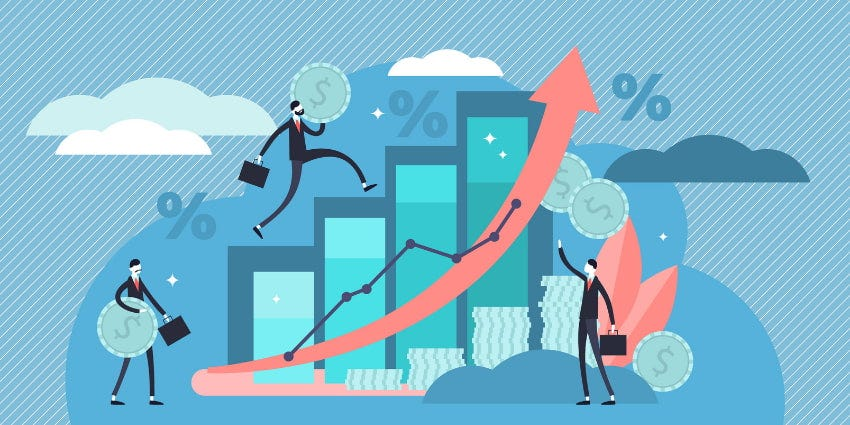

# APPROACH

---




1. Import all the libraries
2. Load and Audit the data
3. Data preparation and Data Transformation
      1. ***Missing values:*** Impute all missing values using Mean, Median and Mode
      2. ***Inconistent values:*** Replace all inconsistence with consistent("NA" or "Unknown" )
      3. ***Outliers:*** Transform or let algorithm deal
4. Data Visualization
5. Data Analysis
      1. ***Uni-Variant Analysis:*** Mean, Median, Mode, Skewness
      2. ***Bi-Varient Analysis:*** Correlation, Covariance, Chi-square test
      3. ***Multi-Varient Analysis:***
        1. Classification
        2. Apply all Classification model
        3. Evaluate which is the better model
       


## IMPORTING LIBRARIES



---






In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

## AUDITING DATA

---



In [3]:
# Importing data
df = pd.read_csv("/content/Advertising.csv")

In [4]:
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
# Univarient Analysis

df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
# Checking the missing values

df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

There is no missing value, Data is clean.

## DATA MANIPULATION


---


In [8]:
# Dropping the unwanted columns

df.drop('Unnamed: 0',inplace = True,axis=1)

In [9]:
# Checking the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB





## DATA VISUALISATION


---


<Axes: >

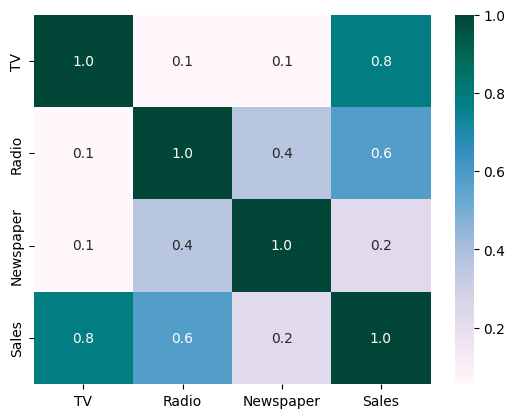

In [10]:
# To see the correlation of the data - BiVarient Analysis

sns.heatmap(df.corr(),annot=True,fmt='0.1f',cmap="PuBuGn")

Here we can find that sales and TV has high positive correlation of 0.8

Text(0.5, 1.0, 'Sales Price')

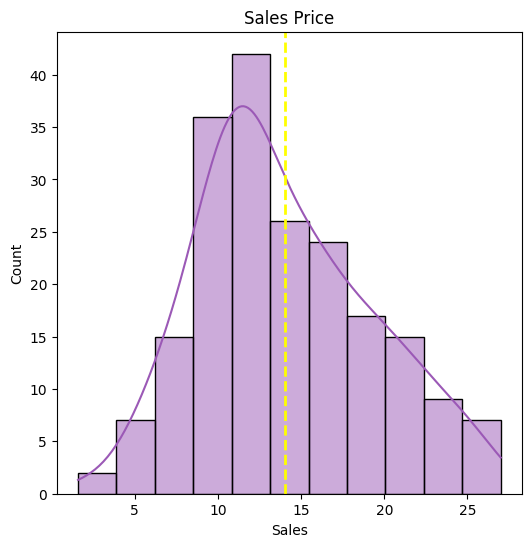

In [11]:
# Distribution of the target variables
plt.figure(figsize=(6,6))
sns.histplot(df['Sales'], kde=True,color='#9b59b6')
plt.axvline(x=df['Sales'].mean(),color='yellow',linestyle='--', linewidth=2)
plt.title('Sales Price')

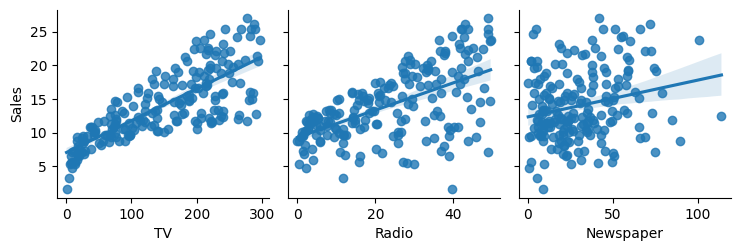

In [14]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

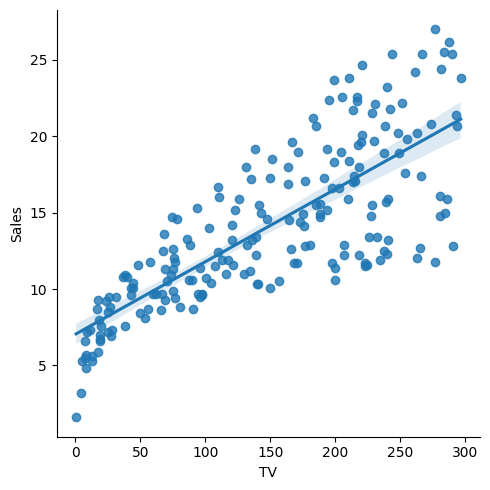

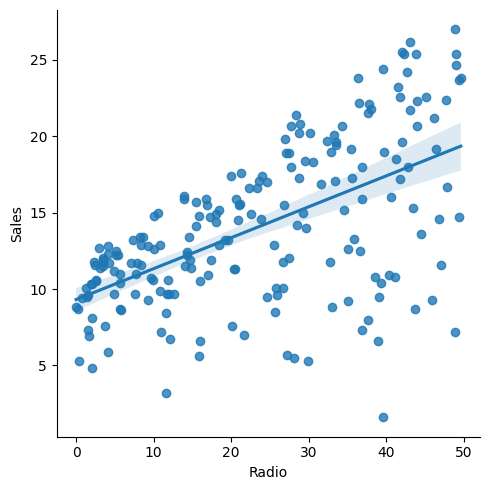

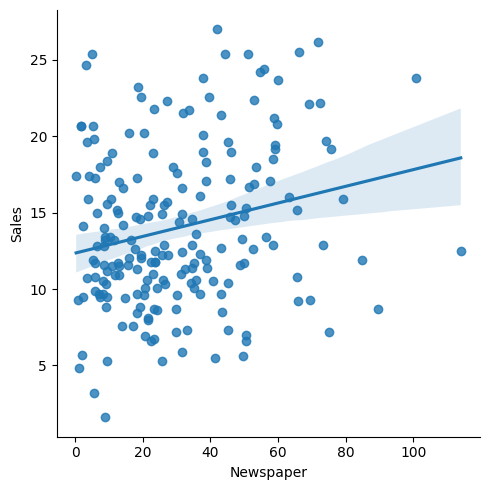

In [15]:
# Linear regression plots to visualize the relationship between each independent variable and the dependent variable
sns.lmplot(x='TV', y='Sales', data=df)
sns.lmplot(x='Radio', y='Sales', data=df)
sns.lmplot(x='Newspaper', y='Sales', data=df)

## SPLITTING TRAIN AND TEST DATA
---

In [18]:
# Feature Variable
x=df.drop(['Sales'],axis=1)

#Target Variable
y=df['Sales']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [34]:
# User Defined function for evaluation metrics
def reg_metrics(actual,pred):
    r2=r2_score(actual,pred)
    mse=mean_squared_error(actual,pred)
    mae=mean_absolute_error(actual,pred)
    rmse= np.sqrt(mse)
    print('R^2 Error : ',round(r2,4))
    print('MSE  : ',round(mse,4))
    print('MAE  : ',round(mae,4))
    print('RMSE : ',round(rmse,4),'\n')

# BUILDING MODEL
---

## <H3> LINEAR REGRESSION </H3>

---



In [35]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_train_lr=lr.predict(x_train)
pred_test_lr=lr.predict(x_test)

In [36]:
print('TRAIN DATA')
print('--------------------------')
reg_metrics(y_train,pred_train_lr)
print('TEST DATA')
print('--------------------------')
reg_metrics(y_test,pred_test_lr)

TRAIN DATA
--------------------------
R^2 Error :  0.9065
MSE  :  2.7603
MAE  :  1.2125
RMSE :  1.6614 

TEST DATA
--------------------------
R^2 Error :  0.8282
MSE  :  2.9884
MAE  :  1.3374
RMSE :  1.7287 



## <H3> GRADIENT BOOSTING</H3>

---



In [37]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [38]:
pred_train_gb=gb.predict(x_train)
pred_test_gb=gb.predict(x_test)

print('TRAIN DATA')
print('--------------------------')
reg_metrics(y_train,pred_train_gb)
print('TEST DATA')
print('--------------------------')
reg_metrics(y_test,pred_test_gb)

TRAIN DATA
--------------------------
R^2 Error :  0.9984
MSE  :  0.0471
MAE  :  0.1656
RMSE :  0.2171 

TEST DATA
--------------------------
R^2 Error :  0.9819
MSE  :  0.3148
MAE  :  0.4214
RMSE :  0.5611 



## <H3> DECISION TREE </H3>

---



In [39]:
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)

pred_train_dtree=dtree.predict(x_train)
pred_test_dtree=dtree.predict(x_test)

print('TRAIN DATA')
print('--------------------------')
reg_metrics(y_train,pred_train_dtree)
print('TEST DATA')
print('--------------------------')
reg_metrics(y_test,pred_test_dtree)

TRAIN DATA
--------------------------
R^2 Error :  1.0
MSE  :  0.0
MAE  :  0.0
RMSE :  0.0 

TEST DATA
--------------------------
R^2 Error :  0.889
MSE  :  1.9308
MAE  :  0.9925
RMSE :  1.3895 



## <H3> RANDOM FOREST </H3>

---



In [40]:
rf=RandomForestRegressor(n_estimators=300,max_depth=7,min_samples_split=10,min_samples_leaf=15)
rf.fit(x_train,y_train)

pred_train_rf=rf.predict(x_train)
pred_test_rf=rf.predict(x_test)

print('TRAIN DATA')
print('--------------------------')
reg_metrics(y_train,pred_train_rf)
print('TEST DATA')
print('--------------------------')
reg_metrics(y_test,pred_test_rf)

TRAIN DATA
--------------------------
R^2 Error :  0.9162
MSE  :  2.4724
MAE  :  1.1986
RMSE :  1.5724 

TEST DATA
--------------------------
R^2 Error :  0.8302
MSE  :  2.9538
MAE  :  1.4057
RMSE :  1.7187 



## <H3> RIDGE REGRESSION </H3>

---



In [41]:
Rid=Ridge(alpha=0.5,solver='svd')
Rid.fit(x_train,y_train)

pred_train_rid=Rid.predict(x_train)
pred_test_rid=Rid.predict(x_test)

print('TRAIN DATA')
print('--------------------------')
reg_metrics(y_train,pred_train_rid)
print('TEST DATA')
print('--------------------------')
reg_metrics(y_test,pred_test_rid)

TRAIN DATA
--------------------------
R^2 Error :  0.9065
MSE  :  2.7603
MAE  :  1.2125
RMSE :  1.6614 

TEST DATA
--------------------------
R^2 Error :  0.8282
MSE  :  2.9884
MAE  :  1.3374
RMSE :  1.7287 



## <H3> ADA BOOSTING </H3>

---



In [42]:
ada=AdaBoostRegressor(n_estimators=160,learning_rate=0.8)
ada.fit(x_train,y_train)

pred_train_ada=ada.predict(x_train)
pred_test_ada=ada.predict(x_test)

print('TRAIN DATA')
print('--------------------------')
reg_metrics(y_train,pred_train_ada)
print('TEST DATA')
print('--------------------------')
reg_metrics(y_test,pred_test_ada)

TRAIN DATA
--------------------------
R^2 Error :  0.9807
MSE  :  0.57
MAE  :  0.6257
RMSE :  0.755 

TEST DATA
--------------------------
R^2 Error :  0.9667
MSE  :  0.5801
MAE  :  0.6007
RMSE :  0.7616 



## <H3>  KNN </H3>

---



In [43]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

pred_train_knn=knn.predict(x_train)
pred_test_knn=knn.predict(x_test)

print('TRAIN DATA')
print('--------------------------')
reg_metrics(y_train,pred_train_knn)
print('TEST DATA')
print('--------------------------')
reg_metrics(y_test,pred_test_knn)

TRAIN DATA
--------------------------
R^2 Error :  0.9507
MSE  :  1.455
MAE  :  0.8629
RMSE :  1.2062 

TEST DATA
--------------------------
R^2 Error :  0.8265
MSE  :  3.018
MAE  :  1.2315
RMSE :  1.7372 

